### Exercise 1. Explore the definition of the class $Graph$:
(i) Represent graphs of your choice and explore the operations to find outgoing
edges, to insert vertices and edges, and to remove them.

(ii) Explore depth-first and breadth-first search on your graphs.

(iii) Implement an operation incomingEdges that returns for a given vertex $v$ all edges $(w, v)$ in your graph.

(iv) Modify the class such that an edge is stored only once, but participates in two doubly linked lists providing outgoing and incoming edges of different nodes (see slide 299).

(v) Compare the space requirements of your modified class with the original class Graph.

(vi) Compare the time required for basic operations (insertion/deletion of edges, determination of outgoing/incoming edges) of your modified class with the original class Graph.

In [72]:
# Original Definition of Graph Class
class Graph:
    def __init__(self,edges=[]):
        self.vertexList = VertexList(edges)
        for e in edges:
            self.addEdge(e)
            self.addEdge((e[1],e[0]))
    def addEdge(self,edge):
        vertex = self.vertexList.locate(edge[0])
        edgelist = vertex.edges
        if edgelist != None:
            edgelist.add(edge[1])
        else:
            edgelist = EdgeList(edge[1])
        vertex.setEdges(edgelist)
    def __iter__(self):
        vertices = self.vertexList
        for v in vertices:
            x = vertices.locate(v)
            y = x.edges
            if y != None:
                for z in y:
                    yield (v,z)
    def insertVertex(self,item):
        if not (item in self.vertexList):
            self.vertexList.append(item)
    def deleteVertex(self,item):
        return self.vertexList.remove(item)
    def insertEdge(self,edge):
        self.vertexList.addVertex(edge)
        self.addEdge(edge)
        self.addEdge((edge[1],edge[0]))
    def deleteEdge(self,edge):
        self.__deleteEdge(edge)
        self.__deleteEdge((edge[1],edge[0]))
    def __deleteEdge(self,edge):
        if not (edge[0] in self.vertexList):
            print("There is no edge", edge)
            return False
        vertexlocation = self.vertexList.locate(edge[0])
        edgelist = vertexlocation.getEdges()
        if edgelist == None:
            print("There is no edge", edge)
            return False
        res = edgelist.remove(edge[1])
        if res == False:
            print("There is no edge", edge)
        return res
    def outgoingEdges(self,item):
        vertex = self.vertexList.locate(item)
        if vertex == None:
            print("There is no vertex", item)
            return []
        edgelist = vertex.getEdges()
        if edgelist == None:
            return []
        res = []
        for v in edgelist:
            res.append((item,v))
        return res
            # yield (item,v) # If we replace the above two lines with this line, then this methods works as an iterator.
    def bfs(self,vertex):
        if not (vertex in self.vertexList):
            print("There is no vertex", vertex)
            return None
        length = self.vertexList.getlength()
        distance = [None] * length
        parent = [None] * length
        index = self.vertexList.index(vertex)
        distance[index] = 0
        parent[index] = vertex
        currentlayer = Fifo(length)
        currentlayer.pushback(vertex)
        nextlayer = Fifo(length)
        for l in range(length):
            for u in currentlayer:
                print(u)
                loc = self.vertexList.locate(u)
                edgelist = loc.getEdges()
                if edgelist != None:
                    for v in edgelist:
                        idx = self.vertexList.index(v)
                        if parent[idx] == None:
                            nextlayer.pushback(v)
                            distance[idx] = l + 1
                            parent[idx] = u
            currentlayer = nextlayer
            nextlayer = Fifo(length)
        return (distance,parent)

    #DFS traverse using stack
    def dfs_stack(self,vertex):
        if not (vertex in self.vertexList):
            print("There is no vertex", vertex)
            return None
        length = self.vertexList.getlength()
        distance = [None] * length
        parent = [None] * length
        index = self.vertexList.index(vertex)
        distance[index] = 0
        parent[index] = vertex
        
        S = Stack(length)
        S.push(vertex)
        while(not S.isEmpty()):
            u = S.pop()
            print(u)
            u_idx = self.vertexList.index(u)
            loc = self.vertexList.locate(u)
            edgelist = loc.getEdges()
            if (edgelist != None):
                for v in edgelist:
                    idx = self.vertexList.index(v)
                    if parent[idx] == None and v not in S.items:
                        S.push(v)
                        parent[idx] = u
                        distance[idx] = distance[u_idx] + 1
        return (distance,parent)  

    #Alternative DFS traverse using recursion
    def allDFS(self):
        numVertices = self.vertexList.getlength()
        initlist = [None]* numVertices
        self.tree = PyList(initlist,numVertices)
        for i in range(numVertices):
            newgraph = Graph([])
            self.tree[i] = newgraph
        for s in self.vertexList:
            self.mark = [None] * numVertices
            self.dfsPos = 1
            self.dfsNum = [1] * numVertices
            self.finishingTime = 1
            self.finishTime = [1] * numVertices
            idx = self.vertexList.index(s)
            if self.mark[idx] == None:
                self.mark[idx] = s
                self.dfsNum[idx] = self.dfsPos
                self.dfsPos += 1
                self.dfs(s,s,idx)
    def dfs(self,vertex1,vertex2,index):
        for e in self.outgoingEdges(vertex2):
            idx = self.vertexList.index(e[1])
            if self.mark[idx] != None:
                self.__traverseNontreeEdge(e)
            else:
                self.tree[index].insertEdge(e)
                self.__traverseTreeEdge(e)
                self.mark[idx] = e[1]
                self.dfs(vertex2,e[1],index)
        self.backtrack(vertex1,vertex2)
    def __traverseTreeEdge(self,e):
        idx = self.vertexList.index(e[1])
        self.dfsNum[idx] = self.dfsPos
        self.dfsPos += 1
    def __traverseNontreeEdge(self,e):
        self.dfsPos = self.dfsPos
    def backtrack(self,vertex1,vertex2):
        idx = self.vertexList.index(vertex2)
        self.finishTime[idx] = self.finishingTime
        self.finishingTime += 1
    
# Definition of VertexList Class
class VertexList:
    class  __Vertex:
        def __init__(self,item,next=None,previous=None):
            self.item=item
            self.next=next
            self.previous=previous
            self.edges=None
        def getItem(self):
            return self.item
        def getNext(self):
            return self.next
        def getPrevious(self):
            return self.previous
        def getEdges(self):
            return self.edges
        def setItem(self,item):
            self.item = item
        def setNext(self,next):
            self.next = next
        def setPrevious(self,previous):
            self.previous = previous
        def setEdges(self,edge):
            self.edges = edge
    
    def __init__(self,edges=[]):
        self.dummy = VertexList.__Vertex(None,None,None)
        self.numVertices = 0
        self.dummy.setNext(self.dummy)
        self.dummy.setPrevious(self.dummy)
        for e in edges:
            self.addVertex(e)
    def __iter__(self):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            yield cursor.getItem()
    def append(self,item):
        lastVertex = self.dummy.getPrevious()
        newVertex = VertexList.__Vertex(item,self.dummy,lastVertex)
        lastVertex.setNext(newVertex)
        self.dummy.setPrevious(newVertex)
        self.numVertices += 1
    def __contains__(self,item):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            vertex = cursor.getItem()
            if vertex == item:
                return True
        return False
    def locate(self,vertex):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            item = cursor.getItem()
            if vertex == item:
                return cursor
    def addVertex(self,edge):
        node1 = edge[0]
        node2 = edge[1]
        if not (node1 in self):
            self.append(node1)
        if not (node2 in self):
            self.append(node2)
    def remove(self,item):
        cursor = self.dummy
        location = None
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            vertex = cursor.getItem()
            edgelist = cursor.edges
            if edgelist != None:
                if item in edgelist:
                    print(item, "cannot be deleted, as it appears in an edge.")
                    return False
            if vertex == item:
                location = cursor
        if location == None:
            print(item, "is not a vertex.")
            return False
        nextVertex = location.getNext()
        prevVertex = location.getPrevious()
        prevVertex.setNext(nextVertex)
        nextVertex.setPrevious(prevVertex)
        self.numVertices -= 1
        return True
    def index(self,item):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            if cursor.getItem() == item:
                return i
        return -1
    def getlength(self):
        return self.numVertices


# Definition of EdgeList Class
class EdgeList:
    class __Edge:
        def __init__(self,item,next=None,previous=None):
            self.item=item
            self.next=next
            self.previous=previous
        def getItem(self):
            return self.item
        def getNext(self):
            return self.next
        def getPrevious(self):
            return self.previous
        def setItem(self,item):
            self.item = item
        def setNext(self,next):
            self.next = next
        def setPrevious(self,previous):
            self.previous = previous
    
    def __init__(self,edge):
        self.first = EdgeList.__Edge(edge,None,None)
        self.first.setNext(self.first)
        self.first.setPrevious(self.first)
        self.numEdges = 1
    def add(self,edge):
        lastEdge = self.first.getPrevious()
        newEdge = EdgeList.__Edge(edge,self.first,lastEdge)
        lastEdge.setNext(newEdge)
        self.first.setPrevious(newEdge)
        self.numEdges += 1
    def __iter__(self):
        cursor = self.first
        for i in range(self.numEdges):
            yield cursor.getItem()
            cursor = cursor.getNext()
    def __contains__(self,item):
        cursor = self.first
        for i in range(self.numEdges):
            vertex = cursor.getItem()
            if vertex == item:
                return True
            cursor = cursor.getNext()
        return False
    def remove(self,item):
        cursor = self.first
        for i in range(self.numEdges):
            vertex = cursor.getItem()
            if vertex == item:
                nextVertex = cursor.getNext()
                prevVertex = cursor.getPrevious()
                prevVertex.setNext(nextVertex)
                nextVertex.setPrevious(prevVertex)
                self.numEdges -= 1
                if (cursor == self.first):
                    self.first = nextVertex
                return True
            cursor = cursor.getNext()
        return False
# Definition of PyList class
class PyList:
    def __init__(self,contents=[],size=20):
        self.items = [None] * size
        self.numItems = 0
        self.size = size
        for e in contents:
            self.append(e)
    def __setitem__(self,index,val):
        if index >= 0 and index < self.numItems:
            self.items[index] = val
            return
        raise IndexError("PyList assignment index out of range")
    def __getitem__(self,index):
        if index >= 0 and index < self.numItems:
            return self.items[index]
        raise IndexError("PyList index out of range")
    def append(self,item):
        if self.numItems == self.size:
            self.allocate()
        self.items[self.numItems] = item
        self.numItems += 1
    def allocate(self):
        newlength = 2 * self.size
        newList = [None] * newlength
        for i in range(self.numItems):
            newList[i] = self.items[i]
        self.items = newList
        self.size = newlength
    def insert(self,i,x):
        if self.numItems == self.size:
            self.allocate()
        if i < self.numItems:
            for j in range(self.numItems-1,i,-1):
                self.items[j+1] = self.items[j]
            self.items[i] = x
            self.numItems += 1
        else:
            self.append(x)
    def __add__(self,other):
        result = PyList(size=self.numItems+other.numItems)
        for i in range(self.numItems):
            result.append(self.items[i])
        for i in range(other.numItems):
            result.append(other.items[i])
        return result
    def delete(self,index):
        if self.numItems == self.size / 4:
            self.deallocate()
        if index <= self.numItems:
            for j in range(index,self.numItems-2):
                self.items[j] = self.items[j+1]
            self.numItems -= 1
        else:
            raise IndexError("PyList index out of range")
    def deallocate(self):
        newlength = self.size / 2
        newList = [None] * newlength
        for i in range(self.numItems):
            newList[i] = self.items[i]
        self.items = newList
        self.size = newlength
    def __contains__(self,item):
        for i in range(self.numItems):
            if self.items[i] == item:
                return True
            return False
    def __eq__(self,other):
        if type(other) != type(self):
            return False
        if self.numItems != other.numItems:
            return False
        for i in range(self.numItems):
            if self.items[i] != self.items[i]:
                return False
            return True
    def qsort(self):
        if self.numItems <= 1:
            return self
        pivot = self.items[0]
        list1 = PyList([],self.numItems)
        listp = PyList([],self.numItems)
        list2 = PyList([],self.numItems)
        for i in range(self.numItems):
            if self.items[i] < pivot:
                list1.append(self.items[i])
            else:
                if self.items[i] == pivot:
                    listp.append(self.items[i])
                else:
                    list2.append(self.items[i])
        slist1 = list1.qsort()
        slist2 = list2.qsort()
        outlist = slist1 + listp + slist2
        return outlist
    def radixSort(self,numdigits,digits):
        sortedlist = self
        for i in range(numdigits):
            sortedlist = sortedlist.Ksort(i,digits)
        return sortedlist          
    def Ksort(self,round,digits):
        bucket = PyList([],digits)
        for k in range(digits):
            newlist = PyList([],self.numItems)
            bucket.append(newlist)
        for i in range(self.numItems):
            item = self.items[i]
            item1 = item // (digits ** round) % digits
            bucket[item1].append(item)
        result = bucket[0]
        for k in range(digits-1):
            result = result + bucket[k+1]
        return result

# Definition of FIFO class
class Fifo:
    def __init__(self,size=20):
        self.items = [None] * size
        self.first = 0
        self.last = -1
        self.size = size
        self.length = 0
    def computelength(self):
        if self.last >= self.first:
            self.length = self.last - self.first + 1
        else:
            self.length = self.last - self.first + 1 + self.size
    def isEmpty(self):
        if self.length != 0:
            return False
        return True
    def front(self):
        if self.length != 0:
            return self.items[self.last]
        raise Error("Queue is empty")
    def back(self):
        if self.length != 0:
            return self.items[self.first]
        raise Error("Queue is empty")
    def pushback(self,item):
        if self.length == self.size:
            self.allocate()
        self.last = (self.last + 1) % self.size
        self.items[self.last] = item
        self.computelength()
    def popfront(self):
        if self.length == self.size / 4:
            self.deallocate()
        if self.last - self.first + 1 != 0:
            frontelement = self.items[self.last]
            self.first = (self.first + 1) % self.size
            self.computelength()
            return frontelement
        raise Error("Queue is empty")
    def __iter__(self):
        rlast = self.first + self.length
        for i in range(self.first,rlast):
            yield self.items[i % self.size]
    def allocate(self):
        newlength = 2 * self.size
        newQueue = [None] * newlength
        for i in range(self.size):
            pos = (i + self.first) % self.size
            newQueue[i] = self.items[pos]
        self.items = newQueue
        self.first = 0
        self.last = self.size - 1
        self.size = newlength
        self.computelength()
    def deallocate(self):
        newlength = self.size / 2
        newQueue = [None] * newlength
        length = (self.last - self.first +1) % self.size
        for i in range(length):
            pos = (i + self.first) % self.size
            newQueue[i] = self.items[pos]
        self.items = newQueue
        self.first = 0
        self.last = length - 1
        self.size = newlength
        self.computelength()

# Definition of Stack class
class Stack:
    def __init__(self,size=20):
        self.items = [None] * size
        self.numItems = 0
        self.size = size
        
    def top(self):
        if self.numItems != 0:
            return self.items[self.numItems-1]
        raise Error("Stack is empty")
        
    def push(self,item):
        if self.numItems == self.size:
            self.allocate()
        self.items[self.numItems] = item
        self.numItems += 1
        
    def allocate(self):
        newlength = 2 * self.size
        newStack = [None] * newlength
        for i in range(self.numItems):
            newStack[i] = self.items[i]
        self.items = newStack
        self.size = newlength
        
    def pop(self):
        if self.numItems == self.size / 4:
            self.deallocate()
        if self.numItems != 0:
            topelement = self.items[self.numItems-1]
            self.numItems -= 1
            return topelement
        raise Error("Stack is empty")
        
    def deallocate(self):
        newlength = self.size // 2
        newStack = [None] * newlength
        for i in range(self.numItems):
            newStack[i] = self.items[i]
        self.items = newStack
        self.size = newlength
        
    def isEmpty(self):
        if self.numItems != 0:
            return False
        return True


In [77]:
# Ex1.(i)
edges = [(1,2),(2,4),(3,5),(2,5),(1,5),(3,4),(3,1),(6,2),(6,3)]
g = Graph(edges)
print(g.outgoingEdges(1))
print([v for v in g.vertexList])
g.insertVertex(7)
g.insertVertex(8)
print([v for v in g.vertexList])
g.deleteVertex(1)
g.deleteVertex(7)
print([v for v in g.vertexList])
print([e for e in g])
g.insertEdge((1,7))
print([e for e in g])
g.deleteEdge((1,2))
print([e for e in g])

[(1, 2), (1, 5), (1, 3)]
[1, 2, 4, 3, 5, 6]
[1, 2, 4, 3, 5, 6, 7, 8]
1 cannot be deleted, as it appears in an edge.
[1, 2, 4, 3, 5, 6, 8]
[(1, 2), (1, 5), (1, 3), (2, 1), (2, 4), (2, 5), (2, 6), (4, 2), (4, 3), (3, 5), (3, 4), (3, 1), (3, 6), (5, 3), (5, 2), (5, 1), (6, 2), (6, 3)]
[(1, 2), (1, 5), (1, 3), (1, 7), (2, 1), (2, 4), (2, 5), (2, 6), (4, 2), (4, 3), (3, 5), (3, 4), (3, 1), (3, 6), (5, 3), (5, 2), (5, 1), (6, 2), (6, 3), (7, 1)]
[(1, 5), (1, 3), (1, 7), (2, 4), (2, 5), (2, 6), (4, 2), (4, 3), (3, 5), (3, 4), (3, 1), (3, 6), (5, 3), (5, 2), (5, 1), (6, 2), (6, 3), (7, 1)]


Print all vertices：[1, 5, 3, 7, 2, 4, 6]
Print all edges：[(1, 5), (1, 3), (1, 7), (5, 2), (5, 3), (3, 4), (3, 6), (2, 4), (2, 6)]
Print the number of edges：9


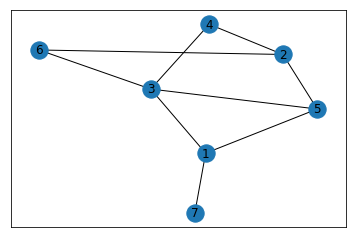

In [78]:
# you can install this package on your own environment to help understand
import networkx as nx
import matplotlib.pyplot as plt
edges = [e for e in g]
# visualization
G = nx.Graph()
G.add_edges_from(edges)
print("Print all vertices：{}".format(G.nodes()))
print("Print all edges：{}".format(G.edges()))
print("Print the number of edges：{}".format(G.number_of_edges()))
nx.draw_networkx(G)
plt.show()


In [75]:
# Ex1.(ii)
print(g.bfs(4))
print('\n')
print(g.dfs_stack(4))

4
2
3
5
6
1
7
([2, 1, 0, 1, 2, 2, None, 3], [3, 4, 4, 4, 2, 2, None, 1])


4
3
6
1
7
5
2
([2, 1, 0, 1, 2, 2, None, 3], [3, 4, 4, 4, 3, 3, None, 1])


In [27]:
# Ex1.(iii)
class Graph:
    def __init__(self,edges=[]):
        self.vertexList = VertexList(edges)
        for e in edges:
            self.addEdge(e)
            self.addEdge((e[1],e[0]))
    def addEdge(self,edge):
        vertex = self.vertexList.locate(edge[0])
        edgelist = vertex.edges
        if edgelist != None:
            edgelist.add(edge[1])
        else:
            edgelist = EdgeList(edge[1])
        vertex.setEdges(edgelist)
    def __iter__(self):
        vertices = self.vertexList
        for v in vertices:
            x = vertices.locate(v)
            y = x.edges
            if y != None:
                for z in y:
                    yield (v,z)
    def insertVertex(self,item):
        if not (item in self.vertexList):
            self.vertexList.append(item)
    def deleteVertex(self,item):
        return self.vertexList.remove(item)
    def insertEdge(self,edge):
        self.vertexList.addVertex(edge)
        self.addEdge(edge)
        self.addEdge((edge[1],edge[0]))
    def deleteEdge(self,edge):
        self.__deleteEdge(edge)
        self.__deleteEdge((edge[1],edge[0]))
    def __deleteEdge(self,edge):
        if not (edge[0] in self.vertexList):
            print("There is no edge", edge)
            return False
        vertexlocation = self.vertexList.locate(edge[0])
        edgelist = vertexlocation.getEdges()
        if edgelist == None:
            print("There is no edge", edge)
            return False
        res = edgelist.remove(edge[1])
        if res == False:
            print("There is no edge", edge)
        return res
    def outgoingEdges(self,item):
        vertex = self.vertexList.locate(item)
        if vertex == None:
            print("There is no vertex", item)
            return []
        edgelist = vertex.getEdges()
        if edgelist == None:
            return []
        res = []
        for v in edgelist:
            res.append((item,v))
        return res
            # yield (item,v) # If we replace the above two lines with this line, then this methods works as an iterator.
    # === 1.(iii) Modification ===
    def incomingEdges(self,item):
        vertex = self.vertexList.locate(item)
        if vertex == None:
            print("There is no vertex", item)
            return []
        res = []
        for other_item in self.vertexList:
            if other_item == item:
                continue
            other_v = self.vertexList.locate(other_item)
            edgelist = other_v.getEdges()
            if edgelist == None:
                continue
            for v in edgelist:
                if v == item:
                    res.append((other_item,item))
        return res
    def bfs(self,vertex):
        if not (vertex in self.vertexList):
            print("There is no vertex", vertex)
            return None
        length = self.vertexList.getlength()
        distance = [None] * length
        parent = [None] * length
        index = self.vertexList.index(vertex)
        distance[index] = 0
        parent[index] = vertex
        currentlayer = Fifo(length)
        currentlayer.pushback(vertex)
        nextlayer = Fifo(length)
        for l in range(length):
            for u in currentlayer:
                print(u)
                loc = self.vertexList.locate(u)
                edgelist = loc.getEdges()
                if edgelist != None:
                    for v in edgelist:
                        idx = self.vertexList.index(v)
                        if parent[idx] == None:
                            nextlayer.pushback(v)
                            distance[idx] = l + 1
                            parent[idx] = u
            currentlayer = nextlayer
            nextlayer = Fifo(length)
        return (distance,parent)

In [28]:
# Ex1.(iii) Tests
g = Graph([(1,2),(2,4),(3,5),(2,5),(1,5),(3,4),(3,1),(6,2),(6,3)])
print(g.incomingEdges(1))
print(g.incomingEdges(5))

[(2, 1), (3, 1), (5, 1)]
[(1, 5), (2, 5), (3, 5)]


In [34]:
# Ex1.(iv)
class Graph_M:
    def __init__(self,edges=[]):
        self.vertexList = VertexList_M(edges)
        self.edgeList = None
        for e in edges:
            self.addEdge(e)
        # Set the pointer to edge lists for each vertex
        cursor = self.vertexList.dummy
        length = self.vertexList.getlength()
        for i in range(length):
            cursor = cursor.getNext()
            vertex = cursor.getItem()
            try:
                cursor.setEdges(self.edgeList.vertexMap[vertex])
            except KeyError:
                cursor.setEdges(None)
    def addEdge(self,edge):
        if self.edgeList != None:
            self.edgeList.add(edge)
        else:
            self.edgeList = EdgeList_M(edge)
    def __iter__(self):
        for edge in self.edgeList:
            yield edge
    def insertVertex(self,item):
        if not (item in self.vertexList):
            self.vertexList.append(item)
    def deleteVertex(self,item):
        return self.vertexList.remove(item)
    def insertEdge(self,edge):
        # Check if the vertices exist before insertion
        update = [0, 0]
        if not (edge[0] in self.vertexList):
            update[0] = 1
        if not (edge[1] in self.vertexList):
            update[1] = 1
        self.vertexList.addVertex(edge)
        self.addEdge(edge)
        # Update edge lists
        if update[0] == 1:
            cursor = self.vertexList.locate(edge[0])
            cursor.setEdges(self.edgeList.vertexMap[edge[0]])
        if update[1] == 1:
            cursor = self.vertexList.locate(edge[1])
            cursor.setEdges(self.edgeList.vertexMap[edge[1]])
    def deleteEdge(self,edge):
        self.__deleteEdge(edge)
    def __deleteEdge(self,edge):
        if not (edge[0] in self.vertexList):
            print("1There is no edge", edge)
            return False
        if not (edge[1] in self.vertexList):
            print("2There is no edge", edge)
            return False
        vertexlocation = self.vertexList.locate(edge[0])
        edgeFirst = vertexlocation.getEdges()
        if edgeFirst == None:
            print("3There is no edge", edge)
            return False
        vertexlocation = self.vertexList.locate(edge[1])
        edgeFirst = vertexlocation.getEdges()
        if edgeFirst == None:
            print("4There is no edge", edge)
            return False
        res = self.edgeList.remove(edge)
        if res == False:
            print("There is no edge", edge)
        elif res == 1:
            self.deleteVertex(edge[0])
        elif res == 2:
            self.deleteVertex(edge[1])
        elif res == 3:
            self.deleteVertex(edge[0])
            self.deleteVertex(edge[1])
        # Update edge lists
        vertexlocation = self.vertexList.locate(edge[0])
        try:
            vertexlocation.setEdges(self.edgeList.vertexMap[edge[0]])
        except KeyError:
            vertexlocation.setEdges(None)
        vertexlocation = self.vertexList.locate(edge[1])
        try:
            vertexlocation.setEdges(self.edgeList.vertexMap[edge[1]])
        except KeyError:
            vertexlocation.setEdges(None)
        return res
    def outgoingEdges(self,item):
        vertex = self.vertexList.locate(item)
        if vertex == None:
            print("There is no vertex", item)
            return []
        edgeFirst = vertex.getEdges()
        if edgeFirst == None:
            return []
        res = []
        flag = 0
        cursor = edgeFirst
        while (flag == 0 or (flag == 1 and cursor != edgeFirst)):
            if flag == 0:
                flag = 1
            edge = cursor.getItem()
            if edge[0] != item:
                edge = (edge[1], edge[0])
            res.append(edge)
            cursor = cursor.getNext(item)
        return res
            # yield (item,v) # If we replace the above two lines with this line, then this methods works as an iterator.
    def incomingEdges(self,item):
        vertex = self.vertexList.locate(item)
        if vertex == None:
            print("There is no vertex", item)
            return []
        edgeFirst = vertex.getEdges()
        if edgeFirst == None:
            return []
        res = []
        flag = 0
        cursor = edgeFirst
        while (flag == 0 or (flag == 1 and cursor != edgeFirst)):
            if flag == 0:
                flag = 1
            edge = cursor.getItem()
            if edge[1] != item:
                edge = (edge[1], edge[0])
            res.append(edge)
            cursor = cursor.getNext(item)
        return res

# Modified VertexList Class
class VertexList_M:
    class  __Vertex:
        def __init__(self,item,next=None,previous=None):
            self.item=item
            self.next=next
            self.previous=previous
            self.edges=None
        def getItem(self):
            return self.item
        def getNext(self):
            return self.next
        def getPrevious(self):
            return self.previous
        def getEdges(self):
            return self.edges
        def setItem(self,item):
            self.item = item
        def setNext(self,next):
            self.next = next
        def setPrevious(self,previous):
            self.previous = previous
        def setEdges(self,edges):
            self.edges=edges
    
    def __init__(self,edges=[]):
        self.dummy = VertexList_M.__Vertex(None,None,None)
        self.numVertices = 0
        self.dummy.setNext(self.dummy)
        self.dummy.setPrevious(self.dummy)
        for e in edges:
            self.addVertex(e)
    def __iter__(self):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            yield cursor.getItem()
    def append(self,item):
        lastVertex = self.dummy.getPrevious()
        newVertex = VertexList_M.__Vertex(item,self.dummy,lastVertex)
        lastVertex.setNext(newVertex)
        self.dummy.setPrevious(newVertex)
        self.numVertices += 1
    def __contains__(self,item):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            vertex = cursor.getItem()
            if vertex == item:
                return True
        return False
    def locate(self,vertex):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            item = cursor.getItem()
            if vertex == item:
                return cursor
        return None
    def addVertex(self,edge):
        node1 = edge[0]
        node2 = edge[1]
        if not (node1 in self):
            self.append(node1)
        if not (node2 in self):
            self.append(node2)
    def remove(self,item):
        location = self.locate(item)
        if location == None:
            print(item, "is not a vertex.")
            return False
        edgeFirst = location.edges
        if edgeFirst != None:
            print(item, "cannot be deleted, as it appears in an edge.")
            return False
        nextVertex = location.getNext()
        prevVertex = location.getPrevious()
        prevVertex.setNext(nextVertex)
        nextVertex.setPrevious(prevVertex)
        self.numVertices -= 1
        return True
    def index(self,item):
        cursor = self.dummy
        for i in range(self.numVertices):
            cursor = cursor.getNext()
            if cursor.getItem() == item:
                return i
        return -1
    def getlength(self):
        return self.numVertices
    
# Modified EdgeList Class
class EdgeList_M:
    class __Edge:
        def __init__(self,item1,item2,next1=None,previous1=None,next2=None,previous2=None):
            self.item1=item1
            self.item2=item2
            self.next1=next1 # Outgoing
            self.previous1=previous1 # Incoming
            self.next2=next2
            self.previous2=previous2
        def getItem(self):
            return (self.item1, self.item2)
        def getNext(self,item):
            if item == self.item1:
                return self.next1
            elif item == self.item2:
                return self.next2
            else:
                raise ValueError("Item not in edge")
        def getPrevious(self,item):
            if item == self.item1:
                return self.previous1
            elif item == self.item2:
                return self.previous2
            else:
                raise ValueError("Item not in edge")
        def setItem1(self,item):
            self.item1 = item
        def setItem2(self,item):
            self.item2 = item
        def setNext(self,next,item):
            if item == self.item1:
                self.next1 = next
            elif item == self.item2:
                self.next2 = next
            else:
                raise ValueError("Item not in edge")
        def setPrevious(self,previous,item):
            if item == self.item1:
                self.previous1 = previous
            elif item == self.item2:
                self.previous2 = previous
            else:
                raise ValueError("Item not in edge")
    
    def __init__(self,edge):
        newEdge = EdgeList_M.__Edge(edge[0],edge[1],None,None,None,None)
        newEdge.setNext(newEdge,edge[0])
        newEdge.setNext(newEdge,edge[1])
        newEdge.setPrevious(newEdge,edge[0])
        newEdge.setPrevious(newEdge,edge[1])
        self.numEdges = 1
        self.vertexMap = {} # Provides the first edge that each vertex points to
        self.vertexMap[edge[0]] = newEdge
        self.vertexMap[edge[1]] = newEdge
    def add(self,edge):
        newEdge = EdgeList_M.__Edge(edge[0],edge[1],None,None,None,None)
        # Check if edge[0] exists in other edges
        try:
            edgeFirst = self.vertexMap[edge[0]]
            edgePrev = edgeFirst.getPrevious(edge[0])
            edgePrev.setNext(newEdge, edge[0])
            newEdge.setPrevious(edgePrev, edge[0])
            newEdge.setNext(edgeFirst, edge[0])
            edgeFirst.setPrevious(newEdge, edge[0])
        except KeyError:
            newEdge.setNext(newEdge,edge[0])
            newEdge.setPrevious(newEdge,edge[0])
            self.vertexMap[edge[0]] = newEdge
        # Check if edge[1] exists in other edges
        try:
            edgeFirst = self.vertexMap[edge[1]]
            edgePrev = edgeFirst.getPrevious(edge[1])
            edgePrev.setNext(newEdge, edge[1])
            newEdge.setPrevious(edgePrev, edge[1])
            newEdge.setNext(edgeFirst, edge[1])
            edgeFirst.setPrevious(newEdge, edge[1])
        except KeyError:
            newEdge.setNext(newEdge,edge[1])
            newEdge.setPrevious(newEdge,edge[1])
            self.vertexMap[edge[1]] = newEdge
        self.numEdges += 1
    def __iter__(self):
        for item in self.vertexMap.keys():
            cursorFirst = self.vertexMap[item]
            cursor = cursorFirst
            flag = 0
            while (flag == 0 or (flag == 1 and cursor != cursorFirst)):
                if flag == 0:
                    flag = 1
                edge = cursor.getItem()
                if edge[0] != item:
                    edge = (edge[1], edge[0])
                yield edge
                cursor = cursor.getNext(item)
    def __contains__(self,item):
        cursor = self.first
        for i in range(self.numEdges):
            vertex = cursor.getItem()
            if vertex == item:
                return True
            cursor = cursor.getNext()
        return False
    def remove(self,edge):
        ret = 4
        # edge[0] cursor
        cursorFirst = self.vertexMap[edge[0]]
        cursor = cursorFirst
        flag = 0
        find_flag = 0
        while (flag == 0 or (flag == 1 and cursor != cursorFirst)):
            if flag == 0:
                flag = 1
            edge_t = cursor.getItem()
            if edge_t == edge or (edge_t[1], edge_t[0]) == edge:
                find_flag = 1
                cursorNext = cursor.getNext(edge[0])
                if cursor == cursorFirst:
                    self.vertexMap[edge[0]] = cursorNext
                    if self.vertexMap[edge[0]] == cursorFirst:
                        del self.vertexMap[edge[0]]
                        ret += 1
                        break
                cursorPrev = cursor.getPrevious(edge[0])
                cursorPrev.setNext(cursorNext, edge[0])
                cursorNext.setPrevious(cursorPrev, edge[0])
                break
            cursor = cursor.getNext(edge[0])
        if find_flag == 0:
            return False
        # edge[1] cursor
        cursorFirst = self.vertexMap[edge[1]]
        cursorNext = cursor.getNext(edge[1])
        if cursor == cursorFirst:
            self.vertexMap[edge[1]] = cursorNext
            if self.vertexMap[edge[1]] == cursorFirst:
                del self.vertexMap[edge[1]]
                ret += 2
        cursorPrev = cursor.getPrevious(edge[1])
        cursorPrev.setNext(cursorNext, edge[1])
        cursorNext.setPrevious(cursorPrev, edge[1])
        return ret

In [35]:
# Ex1.(iv)
g = Graph_M([(1,2),(2,4),(3,5),(2,5),(1,5),(3,4),(3,1),(6,2),(6,3)])
print(g.outgoingEdges(1))
print(g.incomingEdges(1))
print([v for v in g.vertexList])
g.insertVertex(7)
g.insertVertex(8)
print([v for v in g.vertexList])
g.deleteVertex(1)
g.deleteVertex(7)
print([v for v in g.vertexList])
g.deleteVertex(9)
print([e for e in g])
g.insertEdge((1,7))
print([e for e in g])
g.deleteEdge((1,2))
print([e for e in g])

[(1, 2), (1, 5), (1, 3)]
[(2, 1), (5, 1), (3, 1)]
[1, 2, 4, 3, 5, 6]
[1, 2, 4, 3, 5, 6, 7, 8]
1 cannot be deleted, as it appears in an edge.
[1, 2, 4, 3, 5, 6, 8]
9 is not a vertex.
[(1, 2), (1, 5), (1, 3), (2, 1), (2, 4), (2, 5), (2, 6), (4, 2), (4, 3), (3, 5), (3, 4), (3, 1), (3, 6), (5, 3), (5, 2), (5, 1), (6, 2), (6, 3)]
[(1, 2), (1, 5), (1, 3), (1, 7), (2, 1), (2, 4), (2, 5), (2, 6), (4, 2), (4, 3), (3, 5), (3, 4), (3, 1), (3, 6), (5, 3), (5, 2), (5, 1), (6, 2), (6, 3), (7, 1)]
[(1, 5), (1, 3), (1, 7), (2, 4), (2, 5), (2, 6), (4, 2), (4, 3), (3, 5), (3, 4), (3, 1), (3, 6), (5, 3), (5, 2), (5, 1), (6, 2), (6, 3), (7, 1)]


In [16]:
import time

In [31]:
g = Graph([])
# insert
start = time.time()
g.insertEdge((0,0))
insert = time.time()-start
# delete
start = time.time()
g.deleteEdge((0,0))
delete = time.time()-start
print("original insert:",insert)
print("original delete:",delete)

original insert: 6.508827209472656e-05
original delete: 4.506111145019531e-05


In [32]:
# Ex1.(vi)
g = Graph([])
for i in range(10000):
    g.insertEdge((9998,i))
for i in range(10000):
    g.insertEdge((9999,i))
# insert
start = time.time()
g.insertEdge((1000,1000))
insert = time.time()-start
# delete
start = time.time()
g.deleteEdge((9998,9999))
delete = time.time()-start
# outgoing
start = time.time()
test = g.outgoingEdges(9998)
outgoing = time.time()-start

g = Graph_M([])
for i in range(10000):
    g.insertEdge((9998,i))
for i in range(10000):
    g.insertEdge((9999,i))
# insert
start = time.time()
g.insertEdge((1000,1000))
insert_m = time.time()-start
# delete
start = time.time()
g.deleteEdge((9998,9999))
delete_m = time.time()-start
# outgoing
start = time.time()
test = g.outgoingEdges(9998)
outgoing_m = time.time()-start

print("original insert:",insert)
print("modified insert:",insert_m)
print("original delete:",delete)
print("modified delete:",delete_m)
print("original outgoing edges:",outgoing)
print("modified outgoing edges:",outgoing_m)

original insert: 0.001255035400390625
modified insert: 0.0011639595031738281
original delete: 0.009614944458007812
modified delete: 0.013042926788330078
original outgoing edges: 0.006810903549194336
modified outgoing edges: 0.005347251892089844


#### Ex (v) & (vi)
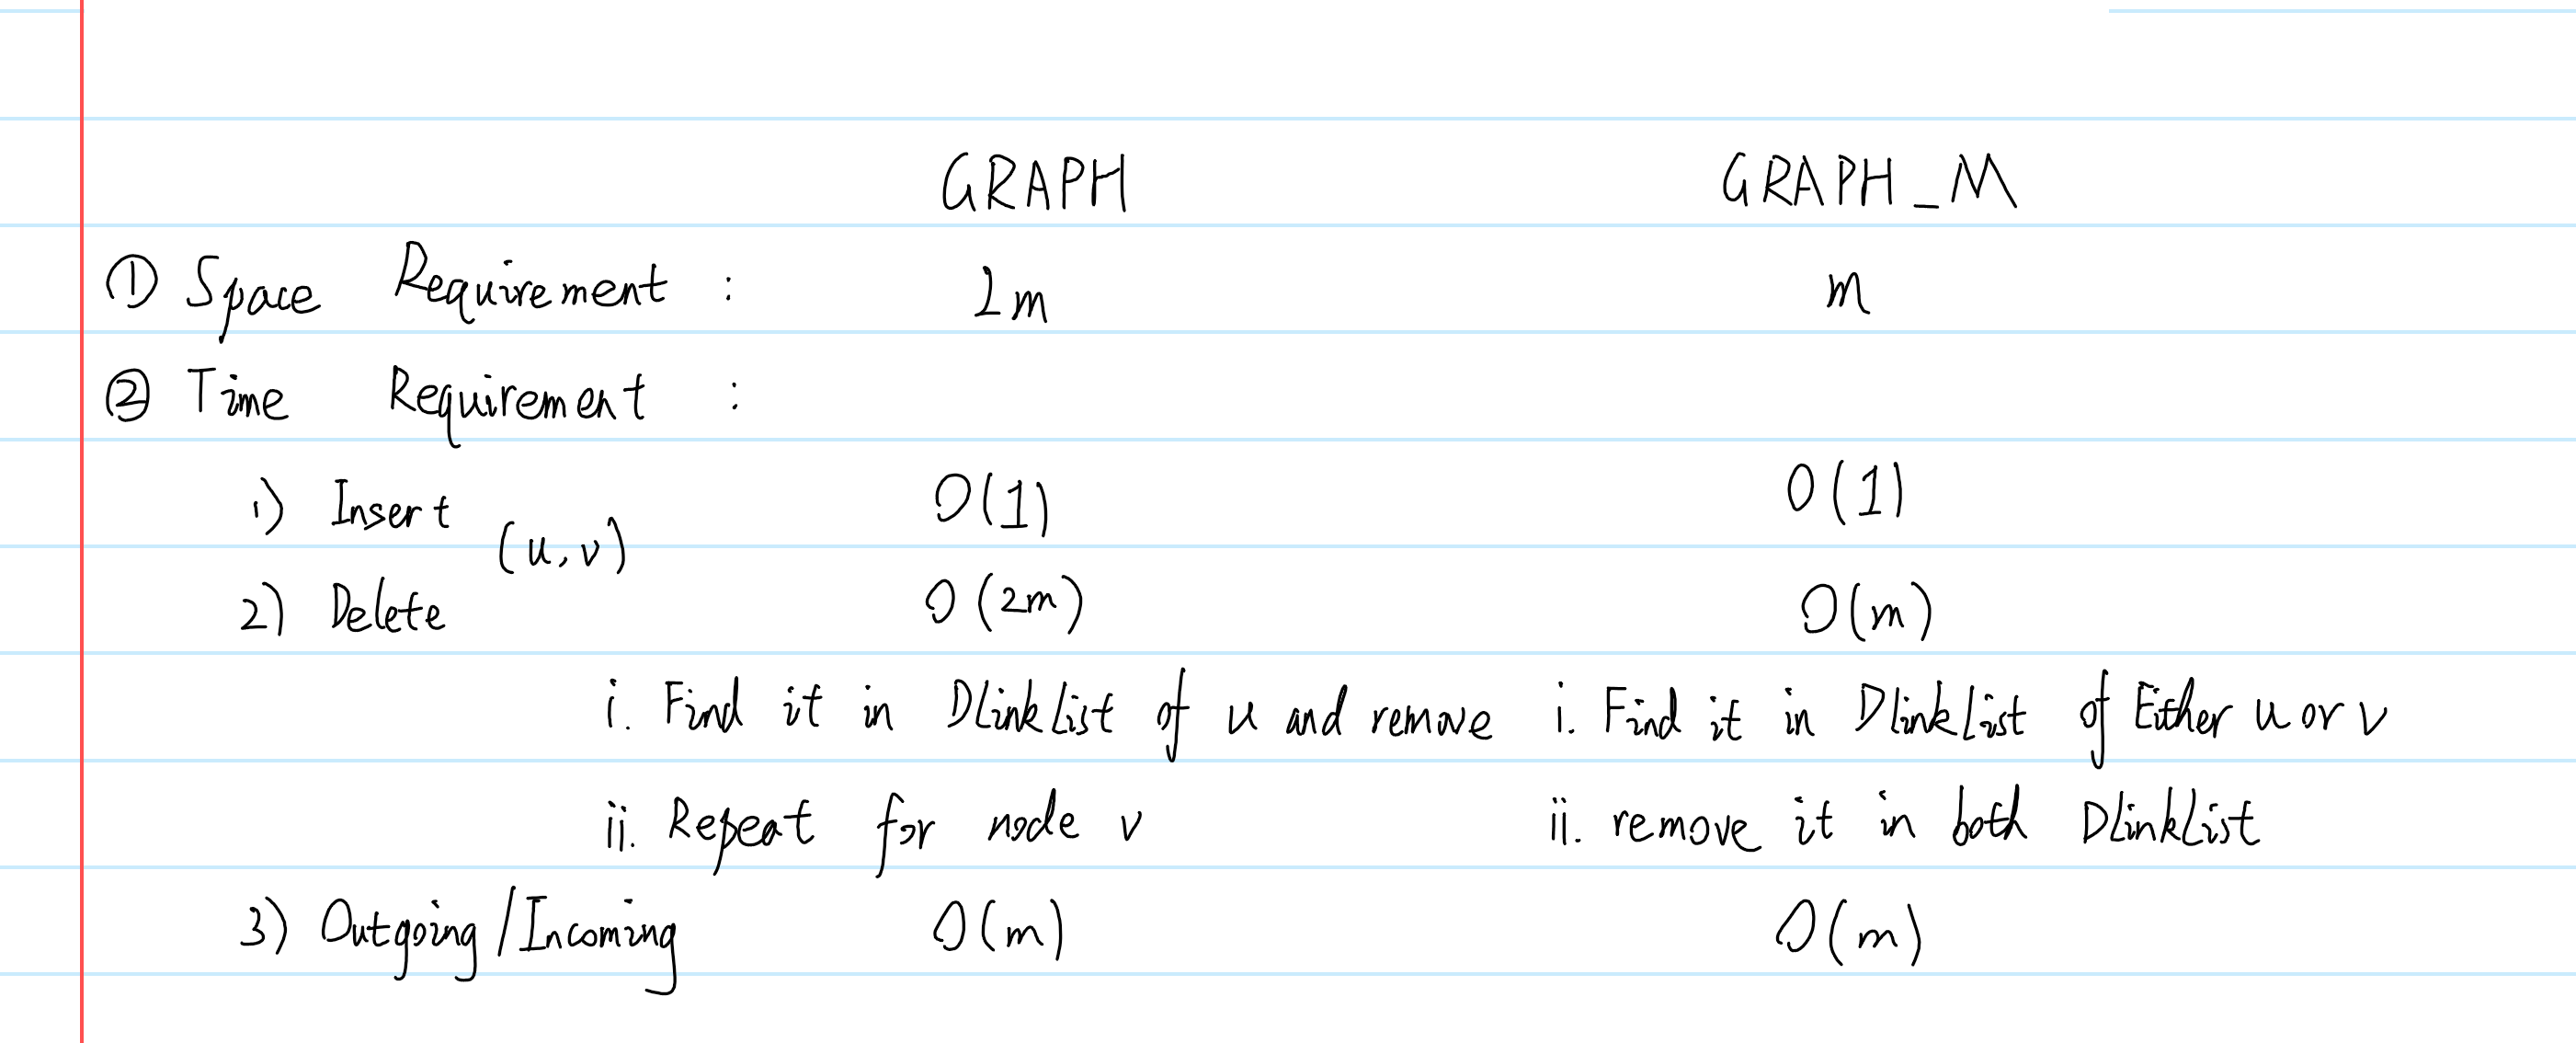